A classifier is a machine learning algorithm that is trained to learn patterns in data and then make predictions about new, unseen data based on those patterns. In other words, a classifier takes in input data, learns to map the input data to corresponding output labels, and then can be used to predict the labels for new input data.

One method for multi-class classification is the "one-vs-rest" (OvR) approach, also known as "one-vs-all". In OvR, a binary classifier is trained for each class, which tries to distinguish that class from all other classes combined. For example, if we have a 3-class classification problem with classes A, B, and C, then we would train three binary classifiers: one to distinguish A from B+C, one to distinguish B from A+C, and one to distinguish C from A+B.

During prediction, each binary classifier is applied to the input data, and the class with the highest score or probability is selected as the final prediction. OvR can work well for problems where the classes are well-separated, but can struggle with more complex decision boundaries where the classes overlap or are closely related.

In practice, many machine learning algorithms and libraries, such as scikit-learn, provide built-in support for OvR classification. In scikit-learn, we can use the OneVsRestClassifier class to train a multi-class classifier using the OvR strategy. This class takes as input any binary classifier and creates a multi-class classifier by training a separate binary classifier for each class using the OvR approach.

In logistic regression for the digits dataset, we can use the OvR approach to perform multi-class classification. This involves training 10 binary classifiers, where each classifier is trained to distinguish one digit class from all other classes combined.

During training, for each binary classifier, we fit a logistic regression model using the training data. The input features are the pixel values of the image, and the binary target variable is 1 if the image corresponds to the digit class we are interested in, and 0 otherwise.

During prediction, we apply all 10 binary classifiers to the input data and obtain a probability score for each class. The class with the highest probability score is selected as the final prediction.

For example, if we want to predict whether an image corresponds to the digit "4", we would use the binary classifier that was trained to distinguish "4" from all other digits. This classifier would output a probability score for the "4" class and for all other classes. We would select the class with the highest score as the final prediction.

The OvR approach in logistic regression for the digits dataset works well because the digit classes are relatively well-separated and distinct from each other. However, it may struggle with more complex decision boundaries where the classes overlap or are closely related. In such cases, other approaches such as the "softmax" approach or support vector machines (SVMs) may be more effective.

In the context of logistic regression for the digits dataset, a binary classifier is a model that is trained to classify a single digit class from all other classes combined. For example, if we want to classify the digit "4", we would train a binary classifier that distinguishes "4" from all other digits (i.e., "0", "1", "2", "3", "5", "6", "7", "8", "9").

The binary classifier is a logistic regression model that takes as input the pixel values of an image and outputs a probability score for the digit class we are interested in. The binary target variable is 1 if the image corresponds to the digit class we are interested in (i.e., "4"), and 0 otherwise.

During training, we fit the logistic regression model using a labeled dataset of images and their corresponding digit classes. The model learns to distinguish the digit class we are interested in from all other classes combined.

During prediction, we apply the binary classifier to a new image and obtain a probability score for the digit class .

Here is an example of a binary classifier function for the digit 4 using logistic regression in Python:

```
from sklearn.linear_model import LogisticRegression

def binary_classifier_4(X_train, y_train, X_test):
    # Filter the training set to only include examples of digit 4
    X_train_4 = X_train[y_train == 4]
    y_train_4 = y_train[y_train == 4]

    # Fit a logistic regression model to the training set
    model = LogisticRegression()
    model.fit(X_train_4, y_train_4)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Return the predicted class labels (0 or 1)
    return y_pred
```

This function takes in the training data (X_train and y_train) and the test data (X_test) as input. It first filters the training set to only include examples of the digit 4, and then fits a logistic regression model to this filtered dataset. Finally, it makes predictions on the test set and returns the predicted class labels (0 or 1). A predicted label of 1 indicates that the input image is classified as a 4, while a predicted label of 0 indicates that it is not a 4.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


In [ ]:
digits = load_digits()


In [ ]:
dir(digits) # The dir(digits) function returns a list of all the attributes and methods associated with the digits object.

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

The dir(digits) function returns a list of all the attributes and methods associated with the digits object. Here is a brief description of each attribute and method:

**DESCR**: A description of the dataset.

**data:** The data associated with the dataset. In the case of the digits dataset, this is a 2D array of pixel values for each image.

**feature_names:** The names of the features in the dataset. In this case, there are no feature names as the dataset only consists of pixel values.

**frame:** This attribute is not relevant to this dataset.

**images:** A 3D array of the image data. Each image is a 2D array of pixel values.

**target:** The target variable for the dataset, i.e., the digit represented in each image.

**target_names:** A list of the possible target values. In this case, the possible
values are the digits 0 through 9.


In [ ]:
digits.data[0] # 8 by 8 image turned into arrays of 64 numbers

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

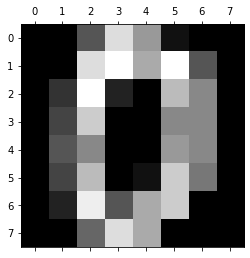

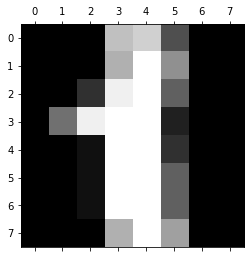

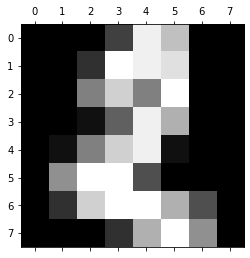

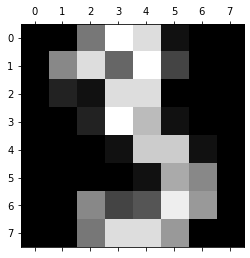

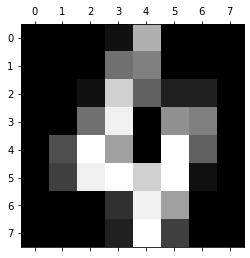

In [ ]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

`plt.gray()` is a function in the matplotlib library that sets the colormap to grayscale. It is commonly used when displaying grayscale images.

`plt.matshow()` is a function in the matplotlib library that displays a matrix as an image. It can be used to visualize matrices and their values using a color map. The color of each pixel in the image represents the corresponding value of the matrix element at that position. By default, the function uses the colormap 'viridis' to map the matrix values to colors. The function can be used to visualize a wide range of matrices, including confusion matrices, correlation matrices, and images represented as matrices.

In [ ]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

will be using data and target to train our data set. 
target variable tells us the number 
data is the image converted into an array .
target is used to tell what is the number basically

In [ ]:
from sklearn.model_selection import train_test_split
# because we dont want to overfit or make our model bias.
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)


In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1437, 360, 1437, 360)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model = LogisticRegression(multi_class='ovr', max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000, multi_class='ovr')

In [ ]:
model.score(X_test,y_test) # calculating X_test values and comparing it to y_test values to evalute the accuracy of
# trained model

0.9611111111111111

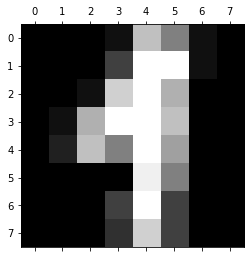

In [ ]:
plt.matshow(digits.images[90])

In [ ]:
digits.target[1]

1

In [ ]:
model.predict([digits.data[90]])

array([1])

In [ ]:
model.predict(digits.data[0:99])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3])

In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([4, 2, 3, 9, 0, 8, 2, 8, 2, 7, 2, 3, 1, 6, 0, 9, 2, 8, 5, 8, 3, 1,
       5, 7, 5, 4, 3, 1, 9, 9, 3, 0, 9, 8, 3, 0, 7, 4, 8, 4, 0, 6, 0, 6,
       7, 0, 8, 5, 2, 3, 0, 9, 6, 8, 1, 0, 0, 5, 3, 9, 1, 5, 9, 4, 6, 4,
       4, 7, 4, 8, 1, 0, 4, 4, 7, 1, 9, 5, 6, 6, 9, 7, 5, 6, 2, 3, 0, 7,
       7, 5, 9, 7, 9, 1, 6, 1, 4, 7, 2, 3, 5, 9, 7, 7, 3, 7, 5, 2, 2, 6,
       5, 5, 3, 4, 1, 4, 6, 3, 0, 8, 7, 1, 2, 9, 5, 7, 3, 7, 1, 1, 9, 3,
       0, 0, 9, 2, 2, 5, 5, 6, 7, 5, 6, 2, 4, 3, 4, 4, 4, 4, 1, 8, 6, 3,
       3, 0, 0, 1, 4, 2, 1, 9, 8, 2, 5, 4, 5, 8, 0, 3, 6, 2, 9, 9, 9, 0,
       9, 7, 6, 2, 0, 2, 0, 3, 4, 0, 0, 4, 9, 8, 6, 2, 5, 5, 0, 9, 9, 3,
       1, 4, 4, 3, 0, 8, 7, 5, 9, 2, 6, 1, 9, 5, 2, 9, 5, 6, 2, 4, 2, 8,
       5, 1, 9, 7, 5, 8, 8, 1, 1, 1, 6, 6, 6, 6, 8, 9, 5, 4, 2, 7, 9, 3,
       6, 9, 4, 0, 5, 6, 9, 9, 1, 1, 0, 9, 6, 0, 8, 6, 8, 6, 8, 8, 1, 7,
       7, 1, 2, 2, 6, 2, 3, 0, 3, 4, 6, 7, 2, 4, 4, 4, 5, 3, 5, 9, 1, 2,
       7, 2, 7, 6, 8, 0, 7, 2, 5, 1, 8, 2, 5, 4, 7,

## Confusion Matrix::
A confusion matrix is a table used to evaluate the performance of a classification model, by comparing the predicted and actual values of the target variable. It contains information about the true positive, true negative, false positive, and false negative predictions of the model.

In a binary classification problem, the confusion matrix has two rows and two columns. The rows represent the actual classes and the columns represent the predicted classes. The four entries of the matrix are:

True Positive (TP): The model predicted positive and it is actually positive

False Positive (FP): The model predicted positive but it is actually negative

True Negative (TN): The model predicted negative and it is actually negative

False Negative (FN): The model predicted negative but it is actually positive

The confusion matrix allows us to calculate various performance metrics such as accuracy, precision, recall, and F1-score. It is a useful tool to evaluate the strengths and weaknesses of a classification model and to identify areas for improvement.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 30,  0,  0,  0,  1,  2,  0],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 42,  0,  1,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  2],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 35]])

Text(69.0, 0.5, 'Truth')

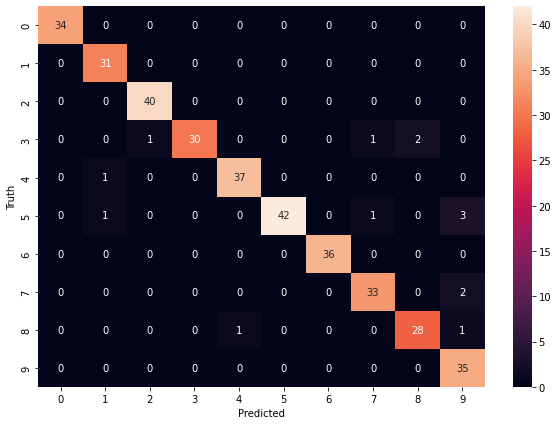

In [ ]:
import seaborn as sn # A library for visualization, same as matplotlib
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

This code creates a heatmap using the seaborn library to visualize the confusion matrix cm. The annot=True argument specifies that the values of the matrix should be displayed within the heatmap. The plt.xlabel and plt.ylabel functions set the labels for the x-axis and y-axis respectively.

A confusion matrix is a table used to evaluate the performance of a classification model by comparing the predicted and actual values for a set of test data. The predicted values are shown along the x-axis and the actual values are shown along the y-axis.

In the heatmap, the lighter colors indicate higher values, while the darker colors indicate lower values. The diagonal line from the top left to the bottom right represents the correctly predicted values, while the off-diagonal elements represent the incorrectly predicted values. The numbers within the heatmap indicate the number of observations in each category.

This visualization can help to identify which categories the model is performing well on and which categories it is not performing well on. It can also help to identify patterns or biases in the errors made by the model.

In [ ]:
# Evaluate the model performance
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.94      1.00      0.97        31
           2       0.98      1.00      0.99        40
           3       1.00      0.88      0.94        34
           4       0.97      0.97      0.97        38
           5       1.00      0.89      0.94        47
           6       1.00      1.00      1.00        36
           7       0.94      0.94      0.94        35
           8       0.93      0.93      0.93        30
           9       0.85      1.00      0.92        35

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



Logistic regression is a binary classification algorithm that is used to classify a dataset into two classes, typically labeled as 0 and 1. However, when dealing with multi-class classification problems, logistic regression can be extended to handle the classification of more than two classes by using a strategy called one-vs-all (OvA) or one-vs-rest (OvR) classification.

In OvA classification, we train a separate binary logistic regression classifier for each class against all other classes. For example, in the case of digit recognition, we can train 10 different classifiers for digits 0 to 9, where each classifier will predict whether an input image belongs to its corresponding digit or not. In contrast, in OvR classification, we train one classifier for each class, where each classifier will predict whether an input image belongs to its corresponding class or not.

In this example, we first load the digits dataset and split it into training and testing sets. Then, we train a logistic regression model using OvR classification and predict the test set. Finally, we evaluate the model performance using classification report and confusion matrix.

The classification_report function displays precision, recall, f1-score, and support for each class. The confusion_matrix function shows the actual and predicted labels for each class, allowing us to analyze the model's performance in more detail. By examining these metrics, we can determine if the logistic regression model is a good fit for the digits dataset.


# Exercise: 

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Convert the dataset into a pandas dataframe
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display the first 5 rows of the dataset
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In the above code, we load the iris dataset and convert it into a pandas dataframe. We also add a new column 'target' to the dataframe, which represents the species of the iris flowers. We then display the first 5 rows of the dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create a logistic regression model and fit it on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the species of the iris flowers in the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Text(69.0, 0.5, 'Truth')

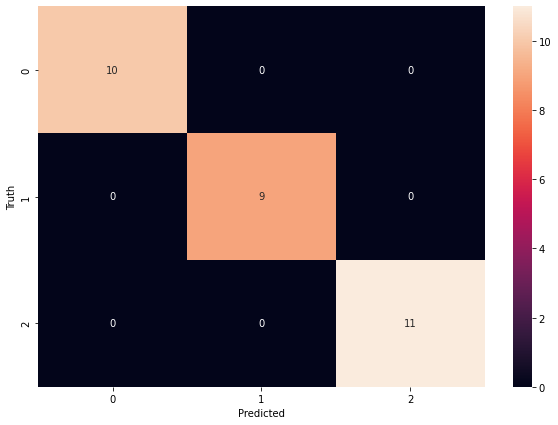

In [ ]:
import seaborn as sn # A library for visualization, same as matplotlib
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')